<a href="https://colab.research.google.com/github/arunslb123/2048/blob/master/Linear_Regression%20SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dataset

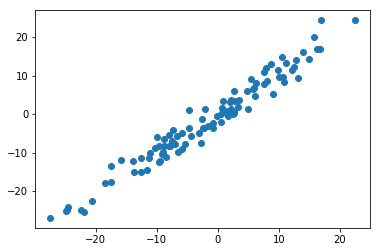

In [2]:
X = torch.randn(100,1) *10
y = X + 2* torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')

In [0]:
class LR(nn.Module):
  
  def __init__(self, inp, op):
    super().__init__()
    self.inp = inp
    self.op = op
    self.l1 = nn.Linear(inp,op)
   
  def forward(self,x):
    return self.l1(x)

   

In [0]:
torch.manual_seed(1)
model = LR(1,1)

In [5]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [0]:
def get_params():
  [w,b] = model.parameters()
  return w[0][0].item(), b[0].item()
  

In [7]:
get_params()

(0.5152631998062134, -0.44137823581695557)

In [0]:
def plot_fit():
  w,b = get_params()
  X1 = np.array([-20,30])
  y1 = w*X1 + b
  plt.plot(X1,y1, 'r')
  plt.scatter(X.numpy(),y.numpy())
  plt.show()

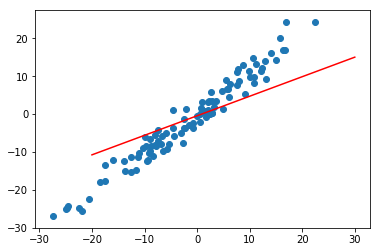

In [9]:
plot_fit()

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [11]:
epochs = 15
losses = []
for i in range(1,epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  loss.backward()
  losses.append(loss.item())
  print("Epoch", i, "loss:", loss.item())
  optimizer.step()
  optimizer.zero_grad()

Epoch 1 loss: 36.730037689208984
Epoch 2 loss: 23.817638397216797
Epoch 3 loss: 16.277421951293945
Epoch 4 loss: 11.874063491821289
Epoch 5 loss: 9.302337646484375
Epoch 6 loss: 7.800117492675781
Epoch 7 loss: 6.922391414642334
Epoch 8 loss: 6.4093146324157715
Epoch 9 loss: 6.10915994644165
Epoch 10 loss: 5.933335781097412
Epoch 11 loss: 5.830110549926758
Epoch 12 loss: 5.7692790031433105
Epoch 13 loss: 5.733202934265137
Epoch 14 loss: 5.711584091186523


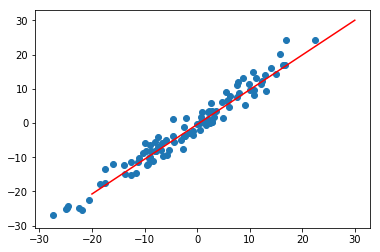

In [12]:
plot_fit()